DATASET: https://www.kaggle.com/ronitf/heart-disease-uci

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
%matplotlib inline 

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:

df['target'].unique()

array([1, 0], dtype=int64)

In [35]:
#separate features and labels
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [17]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=5.0, penalty='l2', tol=0.000001)

In [18]:
logreg.fit(x_train,y_train)

LogisticRegression(C=5.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-06, verbose=0,
                   warm_start=False)

In [20]:
y_pred = logreg.predict(x_test)

In [21]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[19,  7],
       [ 3, 32]], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

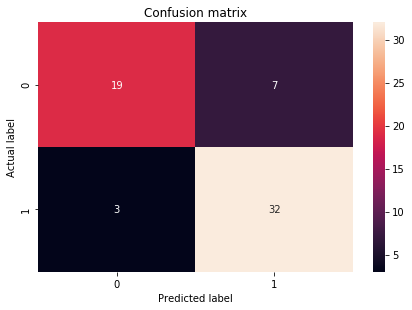

In [25]:
#Define the classes based on your labels (number of categoiries that were the target)
class_names=[0, 1]
fig, ax = plt.subplots()
#And manually created a grid based on the number of categories we are trying to distinguish against each other.
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, fmt = 'g')

ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [29]:
print("Accuracy:",round(metrics.accuracy_score(y_test,y_pred),3))
print("Precision:",round(metrics.precision_score(y_test,y_pred),3))
print("Recall:",round(metrics.recall_score(y_test,y_pred),3))
print("F1 score:",round(metrics.f1_score(y_test,y_pred),3))

Accuracy: 0.836
Precision: 0.821
Recall: 0.914
F1 score: 0.865


In [33]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("Area Under the Curve:",round(metrics.roc_auc_score(y_test, y_pred_proba),3))
#Since the AUC is closer to 1 than to 0, it means that this is a good model that predicts 1s as 1s and 0s as 0s

Area Under the Curve: 0.922


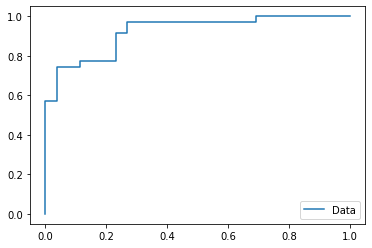

In [34]:
#The ROC graph is for Sensitivity vs Specificity. It summarizes the confusion matrices produced at each threshold
plt.plot(fpr,tpr,label="Data")
plt.legend(loc=4)
plt.show()

Accuracy is the number of correctly predicted data points out of all the data points. More formally, it is defined as the number of true positives and true negatives divided by the number of true positives, true negatives, false positives, and false negatives.

A threshold of say 0.589 would improve the accuracy of the model. 